In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
from typing import Dict
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from pydantic import BaseModel,Field
from typing import List

#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="llama-3.1-8b-instant")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

c:\Users\nehaa\SDLCAgentic\env\Lib\site-packages\pydantic\v1\main.py:1054: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.011691711, 'completion_tokens_details': None, 'prompt_time': 0.002196871, 'prompt_tokens_details': None, 'queue_time': 0.089221592, 'total_time': 0.013888582}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--c8b6e6bb-05fe-4db2-8900-aa01d92fa13a-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [17]:
from typing_extensions import Annotated,Literal,Optional
from pydantic import BaseModel,Field
from  langgraph.graph import StateGraph,START,END
from IPython.display import Image , display
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage


 

In [29]:
class SDLCState(TypedDict,total= False):
    requirement: Optional[str]
    user_story_feedback: Optional[str]
    design_documents: Optional[str]
    designdocument:str =None
    worke_task: Dict[str,str] = None
    genrate_code:Dict[str,str]= None
    code_review_feedback:Literal["approve","revise"]="revise"
    
    security_feedback:Literal["secure","fix"]="fix"
    status:str=Field(default="pending")
    user_story_feedback:str=Field(default="")
    feedback:str="no feedback yet!"
  

In [ ]:
def requirement_node(state: SDLCState):
    req = state.get("input_requirement")
    if not req:
        return {"requirement": "NO REQUIREMENT PROVIDED"}
    return {"requirement": req}



def UserStory(state: SDLCState) -> SDLCState:
    """ generate user story and take feedback """
    
    requirement = state.get("requirement", "")
    feedback = state.get("user_story_feedback", "")

    prompt = [
        "generate a detailed user story:",
        "1. User story [as a role], I want [feature], so that [benefit]",
        "2. Acceptance criteria (list)",
        "3. Error Handling Scenarios:",
        "   - System errors",
        "   - User input errors",
        "   - Network/resource errors",
        "4. Definition of Done",
        f"Requirements: {requirement}",
        f"Feedback: {feedback}"
    ]

    messages = [
        SystemMessage(content="\n".join([
            "You are an expert Agile coach specializing in user story creation.",
            "Focus on creating comprehensive stories with error handling.",
            "Each revision should improve upon the previous version."
        ])),
        HumanMessage(content="\n".join(prompt))
    ]

    revised_design = llm.invoke(messages).content

    return {"design_documents": revised_design}


In [39]:
builder = StateGraph(SDLCState)

builder.add_node("input_requirements", requirement_node)
builder.add_node("auto_gen_us", UserStory)
builder.add_edge(START,"input_requirements")
builder.add_edge("input_requirements","auto_gen_us")
builder.add_edge("auto_gen_us",END)

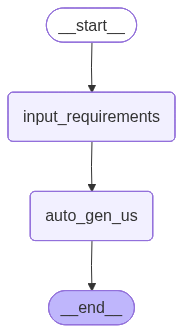

In [40]:
graph = builder.compile()
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [41]:
result = graph.invoke({
    "input_requirement": "user reset forget password.",
    "user_story_feedback": "",
    "code_review_attempt": 0    
})


print(result["design_documents"])


AttributeError: 'dict' object has no attribute 'requirement'